In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load MNIST dataset (ARFF format)
mnist_path = './Datasets/mnist_784.arff'  # Adjust the path if necessary
data, meta = arff.loadarff(mnist_path)

# Convert ARFF data to a pandas DataFrame
mnist_df = pd.DataFrame(data)

# Extract features (pixel values) and labels (digit labels)
X_mnist = mnist_df.iloc[:, :-1].values  # Features (pixels)
y_mnist = mnist_df.iloc[:, -1].values   # Labels (digit)

# Convert y_mnist to integers
y_mnist = y_mnist.astype(int)

# Normalize pixel values to range [0, 1]
X_mnist = X_mnist / 255.0

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Check the shapes of the training and test sets
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (56000, 784)
Test data shape: (14000, 784)


In [3]:
# Train a Logistic Regression model for MNIST
model_mnist = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model_mnist.fit(X_train, y_train)

# Evaluate the model
y_pred_mnist = model_mnist.predict(X_test)
accuracy_mnist = accuracy_score(y_test, y_pred_mnist)
print(f'MNIST Accuracy: {accuracy_mnist}')

MNIST Accuracy: 0.9207857142857143


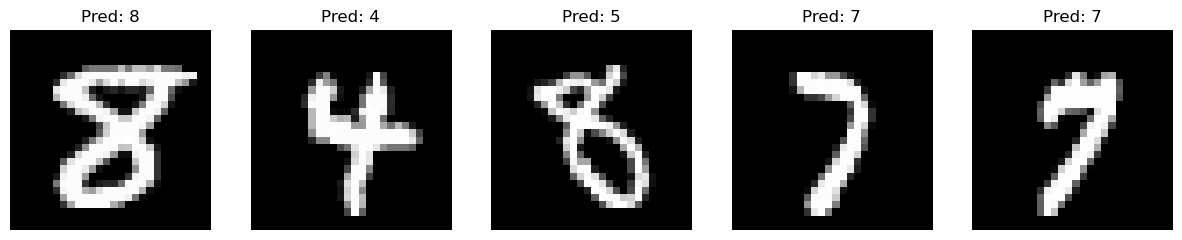

In [4]:
# Plot the first 5 images from the test set and their predicted labels
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')  # Reshape pixels into 28x28
    ax.set_title(f'Pred: {y_pred_mnist[i]}')
    ax.axis('off')

plt.show()

In [5]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}

# Create the model
model_lr = LogisticRegression(max_iter=1000)

# Apply GridSearchCV
grid_search = GridSearchCV(model_lr, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean()}')

In [ ]:
# Learning curve for Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(model_lr, X_train, y_train, cv=5)

# Plotting the learning curve
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
# Try different values of C for SVM
C_values = [0.1, 1, 10, 100]
train_scores, test_scores = [], []

for C in C_values:
    model_svm = SVC(C=C)
    model_svm.fit(X_train, y_train)
    train_scores.append(model_svm.score(X_train, y_train))
    test_scores.append(model_svm.score(X_test, y_test))

# Plot the bias-variance trade-off
plt.plot(C_values, train_scores, label='Train score')
plt.plot(C_values, test_scores, label='Test score')
plt.xscale('log')
plt.xlabel('C (SVM regularization parameter)')
plt.ylabel('Score')
plt.title('Bias-Variance Trade-off for SVM')
plt.legend()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Reduce the data to 2D for decision boundary visualization
pca = PCA(n_components=2)
X_mnist_2d = pca.fit_transform(X_train)

# Train a model on the 2D data (e.g., Logistic Regression)
model = LogisticRegression()
model.fit(X_mnist_2d, y_train)

# Plot decision boundary
h = .02
x_min, x_max = X_mnist_2d[:, 0].min() - 1, X_mnist_2d[:, 0].max() + 1
y_min, y_max = X_mnist_2d[:, 1].min() - 1, X_mnist_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_mnist_2d[:, 0], X_mnist_2d[:, 1], c=y_train, edgecolors='k', marker='o', s=30)
plt.title('Decision Boundary for Logistic Regression (PCA-reduced MNIST)')
plt.show()

In [ ]:
# Compare different models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "kNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')